In [ ]:
import pandas as pd

df = pd.read_pickle('df.pkl')

# Dataset basic analysis

In [ ]:
print(f"Number of columns: {len(df.columns)}")
print(f"Columns: {', '.join(list(df.columns))}")
print(f"Number of rows: {len(df)}")
print(df.head())

Number of columns: 180
Columns: value_target, class_target, well_plate_name, wp_image_version, wp_image_prop, well_name, mock, FNumber, FocalLengthIn35mmFilm, ISOSpeedRatings, Orientation, ExposureTime, FocalLength, Flash, MeteringMode, MaxApertureValue, ExposureBiasValue, BrightnessValue, ApertureValue, ShutterSpeedValue, full_gray_mean, full_gray_stddev, full_gray_mean_trm30, full_gray_skewness, full_gray_entropy, full_gray_entropy2, full_gray_entropy_glcm, full_gray_mean_PIL, full_blue_mean, full_blue_stddev, full_blue_mean_trm30, full_blue_skewness, full_blue_entropy, full_blue_entropy2, full_blue_entropy_glcm, full_blue_mean_PIL, full_green_mean, full_green_stddev, full_green_mean_trm30, full_green_skewness, full_green_entropy, full_green_entropy2, full_green_entropy_glcm, full_green_mean_PIL, full_red_mean, full_red_stddev, full_red_mean_trm30, full_red_skewness, full_red_entropy, full_red_entropy2, full_red_entropy_glcm, full_red_mean_PIL, full_L_mean, full_L_stddev, full_L_mean

# Theory

CFU stands for Colony Forming Units, which is a measure used in microbiology to estimate the number of viable bacteria or fungal cells in a sample. It's not a direct measurement of the total quantity of bacteria, but rather a measure of the number of cells capable of dividing and forming colonies.

In simple words, it is the number of "units of bacteria" capable of forming colonies.

# Class analysis

Number of classes: 6
Classes: ['0000 CFU:mL', '10^1 CFU:mL', '10^2 CFU:mL', '10^4 CFU:mL', '10^6 CFU:mL', '10^8 CFU:mL']
Number of samples in class "0000 CFU:mL": 11616
Number of samples in class "10^1 CFU:mL": 12672
Number of samples in class "10^2 CFU:mL": 11232
Number of samples in class "10^4 CFU:mL": 8544
Number of samples in class "10^6 CFU:mL": 13056
Number of samples in class "10^8 CFU:mL": 4896


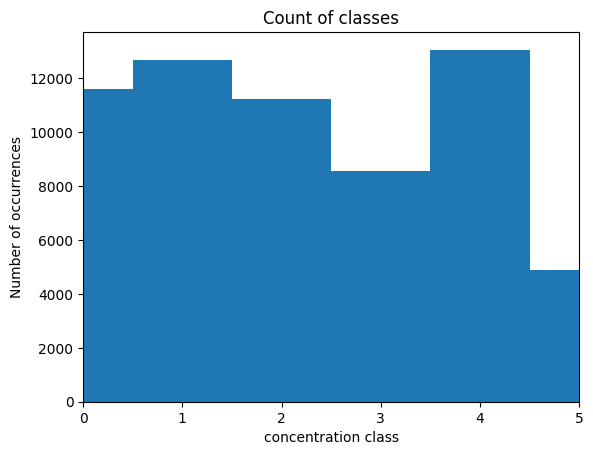

In [ ]:
# Find classes
# classes = df['class_target'].unique()
classes = sorted(df['class_target'].unique())
print(f"Number of classes: {len(classes)}")
print(f"Classes: {classes}")

# Find number of samples per class
# classes_counts = df['class_target'].value_counts()
# print(classes_counts)
classes_counts = []
for c in classes:
    class_count = len(df[df['class_target'] == c])
    classes_counts.append(class_count)
    print(f"Number of samples in class \"{c}\": {class_count}")

# # Get distribution of gold concentration
import matplotlib.pyplot as plt

# Count the occurrences of value_target in each interval
intervals = list(range(0, len(classes)))
# Plot the histogram
plt.bar(intervals, classes_counts, width=1)

# Set the labels and title
plt.xlabel('concentration class')
plt.ylabel('Number of occurrences')
plt.title('Count of classes')

# Adjust x-axis to start from 0
plt.xlim(0, max(intervals))

# Show the plot
plt.show()


# Regression analysis

Max concentration: 1.521
Min concentration: 0.184


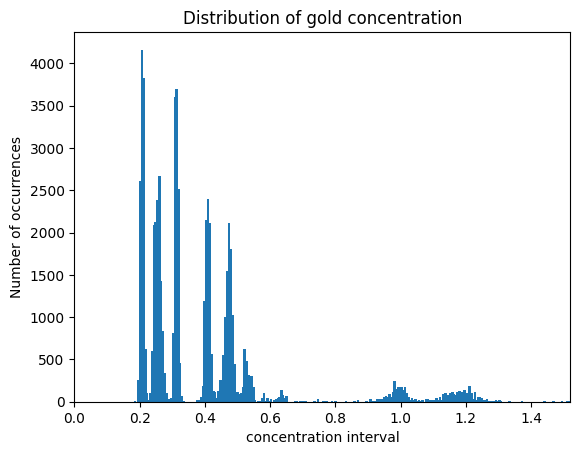

In [ ]:
# Get distribution of gold concentration
import matplotlib.pyplot as plt

# Get the maximum and minimum values of value_target
max_value = df['value_target'].max()
min_value = df['value_target'].min()

print(f"Max concentration: {max_value}")
print(f"Min concentration: {min_value}")

# Calculate the step size
number_of_intervals = 250
step_size = (max_value - min_value) / number_of_intervals
intervals = [min_value + i * step_size for i in range(number_of_intervals + 1)]

# Count the occurrences of value_target in each interval
value_counts, _, _ = plt.hist(df['value_target'], bins=intervals)

# Plot the histogram
plt.bar(intervals[:-1], value_counts, width=step_size)

# Set the labels and title
plt.xlabel('concentration interval')
plt.ylabel('Number of occurrences')
plt.title('Distribution of gold concentration')

# Adjust x-axis to start from 0
plt.xlim(0, max(intervals))

# Show the plot
plt.show()


# Missing Data Analysis

Percentage of missing values per column:
value_target: 0.0%
class_target: 0.0%
well_plate_name: 0.0%
wp_image_version: 0.0%
wp_image_prop: 0.0%
well_name: 0.0%
mock: 0.0%
FNumber: 0.0%
FocalLengthIn35mmFilm: 0.0%
ISOSpeedRatings: 0.0%
Orientation: 0.0%
ExposureTime: 0.0%
FocalLength: 0.0%
Flash: 0.0%
MeteringMode: 0.0%
MaxApertureValue: 0.0%
ExposureBiasValue: 0.0%
BrightnessValue: 0.0%
ApertureValue: 0.0%
ShutterSpeedValue: 0.0%
full_gray_mean: 0.0%
full_gray_stddev: 0.0%
full_gray_mean_trm30: 0.0%
full_gray_skewness: 0.0%
full_gray_entropy: 0.0%
full_gray_entropy2: 0.0%
full_gray_entropy_glcm: 0.0%
full_gray_mean_PIL: 0.0%
full_blue_mean: 0.0%
full_blue_stddev: 0.0%
full_blue_mean_trm30: 0.0%
full_blue_skewness: 0.0%
full_blue_entropy: 0.0%
full_blue_entropy2: 0.0%
full_blue_entropy_glcm: 0.0%
full_blue_mean_PIL: 0.0%
full_green_mean: 0.0%
full_green_stddev: 0.0%
full_green_mean_trm30: 0.0%
full_green_skewness: 0.0%
full_green_entropy: 0.0%
full_green_entropy2: 0.0%
full_green_entrop

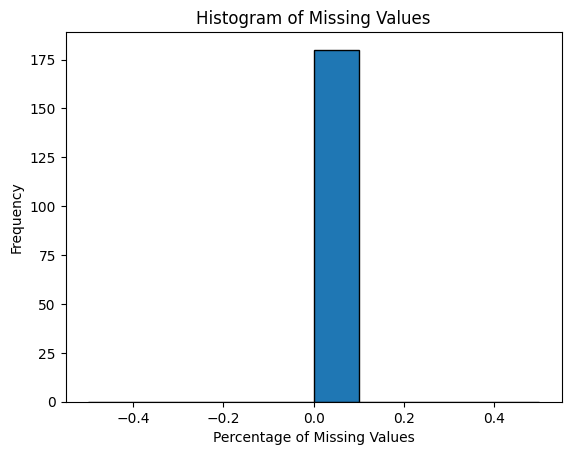

In [ ]:
import numpy as np

print("Percentage of missing values per column:")
pct_missings = []
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    pct_missings.append(pct_missing)
    print(f'{col}: {pct_missing}%')

print(f"Mean percentage of missing values: {np.mean(pct_missings)}")

# Print the histogram of missing values using matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(pct_missings, bins=10, edgecolor='black')
ax.set_title('Histogram of Missing Values')
ax.set_xlabel('Percentage of Missing Values')
ax.set_ylabel('Frequency')
plt.show()

## Outlier Analysis

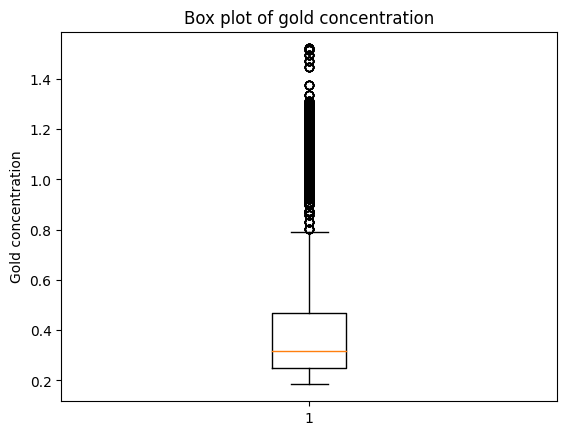

Number of outliers: 40


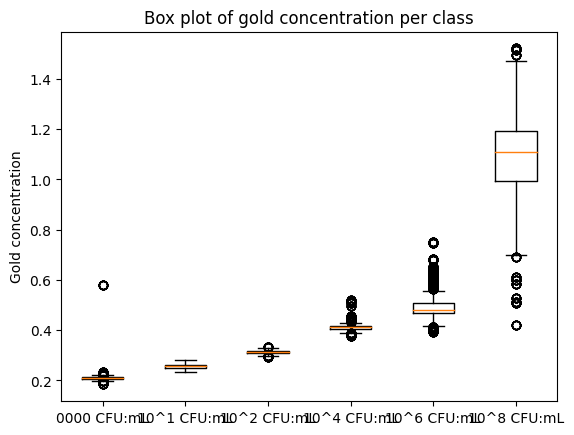

In [ ]:
# Box plot of the gold concentration
import matplotlib.pyplot as plt

plt.boxplot(df['value_target'])
plt.title('Box plot of gold concentration')
plt.ylabel('Gold concentration')
plt.show()

# Count number of outliers
# # Count number of occurrences greater than 3 standard deviations from the mean
# mean = df['value_target'].mean()
# std = df['value_target'].std()
# outliers = df[(df['value_target'] > mean + 3 * std) | (df['value_target'] < mean - 3 * std)]
# print(f"Number of outliers: {len(outliers)}")

# Count number of occurrences greater than max_value or less than min_value
max_value = 1.4
min_value = 0.7

# outliers = df[(df['value_target'] > max_value) | (df['value_target'] < min_value)]
outliers = df[(df['value_target'] > max_value)]
print(f"Number of outliers: {len(outliers)}")

# Box plot of the gold concentration per class
import matplotlib.pyplot as plt

# Create a list of gold concentrations per class
class_values = []
for c in classes:
    class_values.append(df[df['class_target'] == c]['value_target'])

# Create a box plot
plt.boxplot(class_values)
plt.title('Box plot of gold concentration per class')
plt.ylabel('Gold concentration')
plt.xticks(range(1, len(classes) + 1), classes)
plt.show()

# Classification

Algorithms we can use:
- K-means
- K-medoids
- Hierarchical clustering

In [ ]:
# Conversion of categorical features

FEATURES_COLUMNS = [col for col in df.columns if col not in ["value_target", "class_target"]]
NUMERIC_FEATURES = [col for col in FEATURES_COLUMNS if pd.api.types.is_numeric_dtype(df[col])]
CATEGORICAL_FEATURES = [col for col in df.columns if pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col])]
print(CATEGORICAL_FEATURES)
df_cut = pd.get_dummies(df[CATEGORICAL_FEATURES])
print(df_cut)

['well_plate_name', 'wp_image_version', 'well_name', 'FNumber', 'ExposureTime', 'FocalLength', 'MaxApertureValue', 'ExposureBiasValue', 'BrightnessValue', 'ApertureValue', 'ShutterSpeedValue']
       well_plate_name_05  well_plate_name_06  well_plate_name_07  \
0                    True               False               False   
1                    True               False               False   
2                    True               False               False   
3                    True               False               False   
4                    True               False               False   
...                   ...                 ...                 ...   
62011               False               False               False   
62012               False               False               False   
62013               False               False               False   
62014               False               False               False   
62015               False               False   

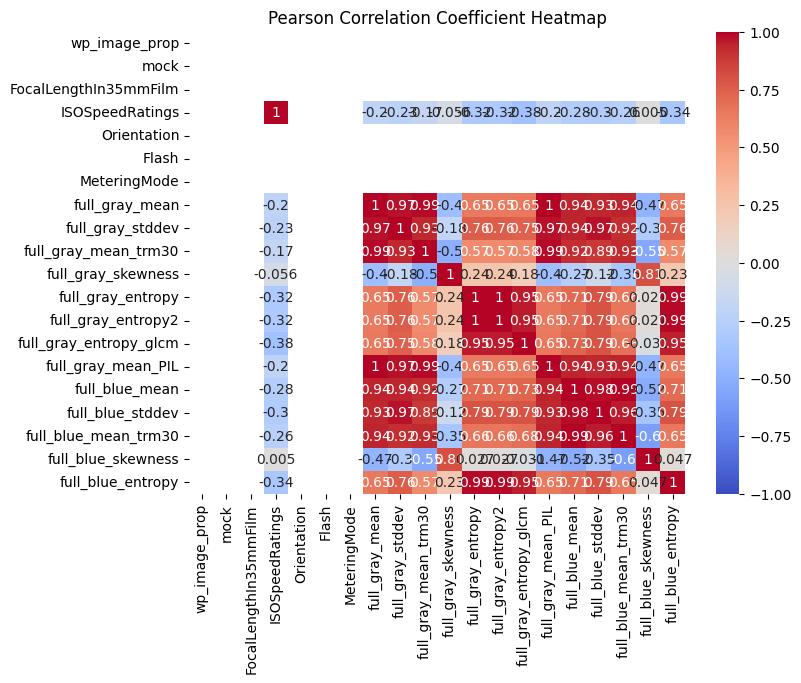

Features after dropping highly correlated columns:
       wp_image_prop   mock  FocalLengthIn35mmFilm  ISOSpeedRatings  \
0                0.0  False                    0.0            226.0   
1                0.0  False                    0.0            226.0   
2                0.0  False                    0.0            226.0   
3                0.0  False                    0.0            226.0   
4                0.0  False                    0.0            226.0   
...              ...    ...                    ...              ...   
62011            0.0  False                    0.0            103.0   
62012            0.0  False                    0.0            103.0   
62013            0.0  False                    0.0            103.0   
62014            0.0  False                    0.0            103.0   
62015            0.0  False                    0.0            103.0   

       Orientation  Flash  MeteringMode  full_gray_mean  full_gray_skewness  \
0              1.

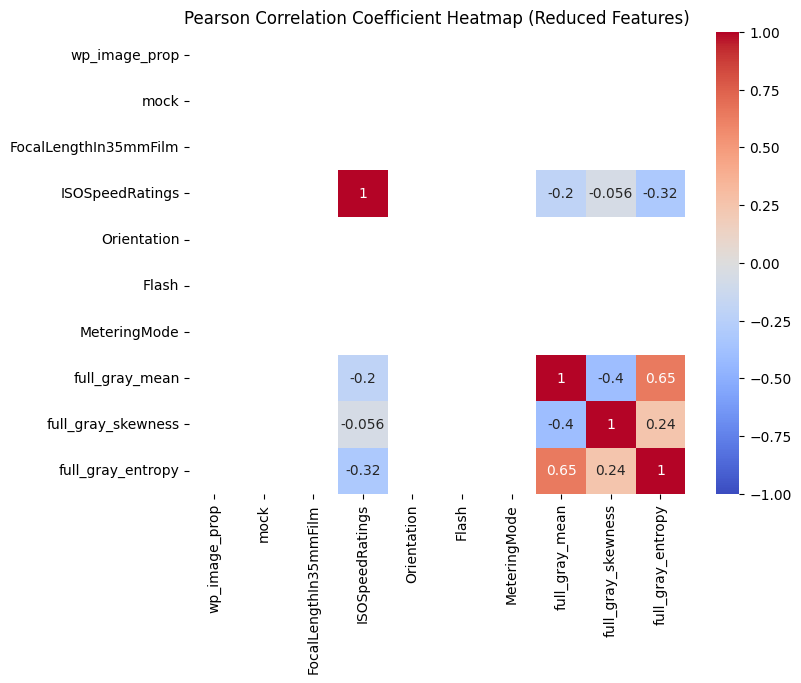

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Feature selection
## Pearson correltion coefficient
df_num = df[NUMERIC_FEATURES[0:20]]

correlation_matrix = df_num.corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Coefficient Heatmap')
plt.show()

## Chi Squared
# Set the correlation threshold
threshold = 0.8

# Create a mask to identify columns to drop
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)

# Drop the identified columns
df_num_dropped = df_num.drop(columns=to_drop)

# Print the resulting DataFrame
print("Features after dropping highly correlated columns:")
print(df_num_dropped)

# Plot the heatmap of the remaining features
plt.figure(figsize=(8, 6))
sns.heatmap(df_num_dropped.corr(method='pearson'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Coefficient Heatmap (Reduced Features)')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

# Convert categorical target to numerical values
le = LabelEncoder()
y = le.fit_transform(df["class_target"])

# Select categorical features for chi-squared test
categorical_features = [col for col in df.columns if pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col])]

# Chi-squared test
chi2_values, p_values = chi2(df[NUMERIC_FEATURES], y)

# Print Chi-Squared test results
chi2_results = pd.DataFrame({"Feature": categorical_features, "Chi2 Stat": chi2_values, "p-value": p_values})
print("Chi-Squared Test Results:")
print(chi2_results)


ValueError: Input X must be non-negative.

TODO:
- Rescaling prima PCA e prima del training
- Finisici feature selection
- Converti dati categorici in dati numerici
- Aggiusta Pearson Correlation
- Aggiungi violin plot
- Il box plot e il violin plot servono per trovare outlier e, se confrontati a due a due per classi diverse, determinare se una particolare feature può permettere di distinguere le classi
- Scrivi la varianza spiegata da ogni componente della PCA
- Chiedi al prof il fatto dei giorni (esempio trading - ma poi come funziona il plot?) + well_image_version: sono features??

## K-means and K-medoids

### Data pre processing

## Hierarchical clustering

### Data pre processing

## Deep learning

### Data pre processing